In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df_features = pd.read_csv("covid19_merged.csv").drop(["Unnamed: 0", 
                                                      "covid_confirmed_4_2_20", 
                                                      "covid_deaths_4_2_20",
                                                      "covid_recovered_4_2_20"], axis=1)
cols = df_features.columns
cols = [c for c in cols if "temp" not in c]
cols = [c for c in cols if "precip" not in c]
df_features = df_features[cols]

In [13]:
df_confirmed = pd.read_csv("../datasets/dataset_gen/Jhon Hopkins/confirmed.csv")
df_deaths = pd.read_csv("../datasets/dataset_gen/Jhon Hopkins/deaths.csv")
df_recovered = pd.read_csv("../datasets/dataset_gen/Jhon Hopkins/recovered.csv")

In [14]:
df_total_confirmed = df_confirmed[df_confirmed["Date"] == "2020-05-04"].drop("Date", axis=1)
df_total_confirmed = df_total_confirmed.replace("US", "United States")
df_total_deaths = df_deaths[df_deaths["Date"] == "2020-05-04"].drop("Date", axis=1)
df_total_deaths = df_total_deaths.replace("US", "United States")
df_total_recovered = df_recovered[df_recovered["Date"] == "2020-05-04"].drop("Date", axis=1)
df_total_recovered = df_total_recovered.replace("US", "United States")

In [15]:
df_total_confirmed

,Country,Confirmed
19261,Afghanistan,2894
19262,Albania,803
19263,Algeria,4648
19264,Andorra,750
19265,Angola,35
...,...,...
19443,West Bank and Gaza,362
19444,Western Sahara,6
19445,Yemen,12
19446,Zambia,137


In [16]:
df_merged = df_features.merge(df_total_confirmed, left_on="country", right_on="Country").drop(["Country"], axis=1)
df_merged = df_merged.merge(df_total_deaths, left_on="country", right_on="Country").drop(["Country"], axis=1)
df_merged = df_merged.merge(df_total_recovered, left_on="country", right_on="Country").drop(["Country"], axis=1)
df_merged

,country,covid19_first_date,Flu_pneumonia_death_rate_per_100000,h1n1_Geographic_spread,h1n1_Intensity,h1n1_Impact_on_healthcare_services,h1n1_Cases_underestimate,h1n1_Cases_confirmed,h1n1_Deaths_confirmed,first_school_closure_date,...,sex_male_to_female_15_24_years,sex_male_to_female_25_54_years,sex_male_to_female_55_64_years,sex_male_to_female_over_65,sex_male_to_female_total,latitude,longitude,Confirmed,Deaths,Recovered
0,Afghanistan,2020-02-24 22:00:00,64.21,NaN,NaN,NaN,0.0,853.0,17.0,2020-03-03 00:00:00,...,1.03,1.03,0.97,0.85,1.03,33.939110,67.709953,2894,90,397
1,Albania,2020-03-09 22:00:00,11.29,S,*,mod,0.0,426.0,12.0,2020-03-11 00:00:00,...,1.09,0.93,0.95,0.87,0.98,41.153332,20.168331,803,31,543
2,Algeria,2020-02-25 22:00:00,27.82,NaN,NaN,NaN,0.0,916.0,57.0,2020-03-12 00:00:00,...,1.05,1.03,1.01,0.89,1.03,28.033886,1.659626,4648,465,1998
3,Andorra,2020-03-02 22:00:00,NaN,NaN,NaN,NaN,0.0,1.0,0.0,2020-03-16 00:00:00,...,1.08,1.05,1.15,1.02,1.06,42.546245,1.601554,750,45,499
4,Angola,2020-03-20 22:00:00,176.70,NaN,NaN,NaN,0.0,37.0,0.0,2020-03-24 00:00:00,...,1.04,1.02,0.94,1.50,1.02,-11.202692,17.873887,35,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Uzbekistan,2020-03-15 22:00:00,24.69,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16 00:00:00,...,1.03,0.99,0.90,0.74,0.99,41.377491,64.585262,2189,10,1405
167,Venezuela,2020-03-14 22:00:00,24.12,W,*,mod,0.0,2187.0,135.0,2020-03-16 00:00:00,...,1.03,0.98,0.92,0.79,0.99,6.423750,-66.589730,357,10,158
168,Vietnam,2020-01-23 12:00:00,23.39,NaN,NaN,NaN,0.0,11186.0,58.0,2020-02-28 00:00:00,...,1.08,1.01,0.85,0.63,1,14.058324,108.277199,271,0,219
169,Zambia,2020-03-18 22:00:00,90.00,NaN,NaN,NaN,0.0,726.0,0.0,2020-03-20 00:00:00,...,1.00,1.02,0.88,0.76,1,-13.133897,27.849332,137,3,78


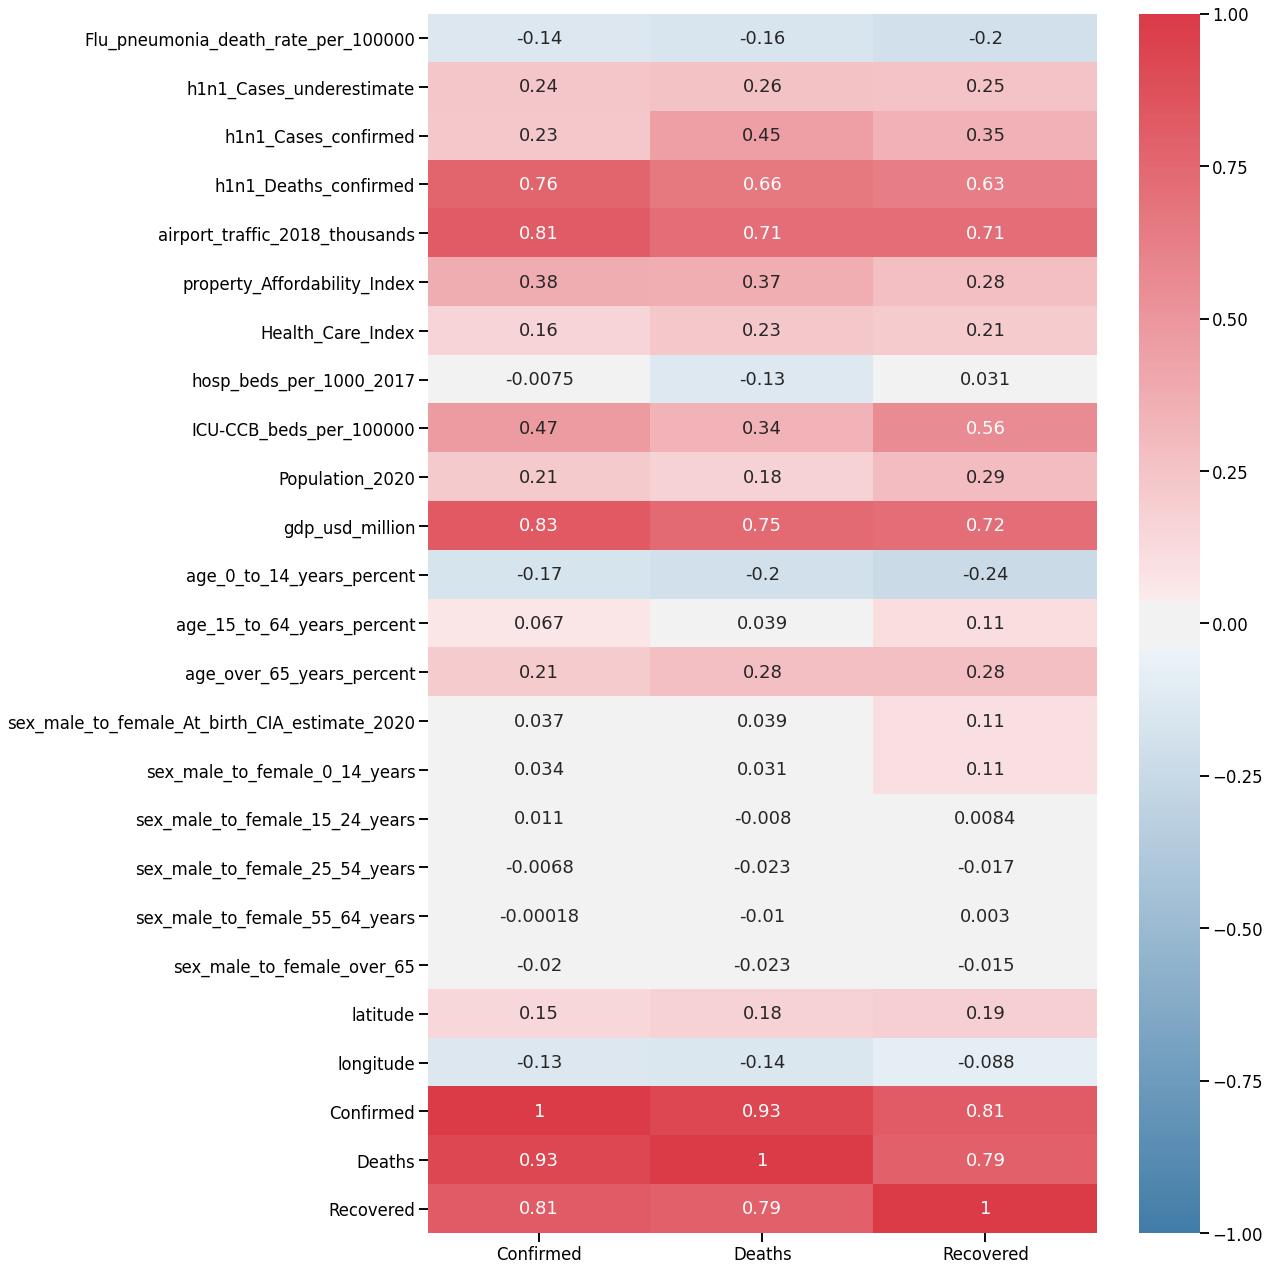

In [17]:
sns.set_context("talk")

corr = df_merged.corr()
corr = corr.loc[:,["Confirmed", "Deaths", "Recovered"]]
mask = np.zeros_like(corr, dtype=np.bool)


plt.figure(figsize=(18, 18))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,annot=True)

plt.tight_layout()